# World Happiness with Pandas

In this exercise we will examine contributing factors to happiness in countries around the world as measured by various indicators (https://worldhappiness.report/). 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib

# Import the data

Read the file (happyness_2021.csv) in using pandas. Familiarize yourself with the structure of the data. You may want to try pandas.DataFrame.describe and pandas.DataFrame.info. Display the head and tail of the dataset.

In [2]:
hppy = pd.read_csv('happyness_2021.csv')

# hppy = pd.read_csv('happyness_2021.csv', index_col=0) ## this drops the first colum of the index

In [3]:
hppy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [5]:
display(hppy)
#hppy.describe()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


### Correlations between indicators

Find the variable most correlated with happiness.
Hint: You may want to use a scatter plot matrix.

In [6]:
b = [2,6,7,8,9,10,11]
hppy2 = hppy[hppy.columns[b]]
#hppy2 = hppy.iloc[:,b]

display(hppy2)

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.842,10.775,0.954,72.000,0.949,-0.098,0.186
1,7.620,10.933,0.954,72.700,0.946,0.030,0.179
2,7.571,11.117,0.942,74.400,0.919,0.025,0.292
3,7.554,10.878,0.983,73.000,0.955,0.160,0.673
4,7.464,10.932,0.942,72.400,0.913,0.175,0.338
...,...,...,...,...,...,...,...
144,3.512,7.926,0.787,48.700,0.715,-0.131,0.915
145,3.467,9.782,0.784,59.269,0.824,-0.246,0.801
146,3.415,7.676,0.552,61.400,0.897,0.061,0.167
147,3.145,7.943,0.750,56.201,0.677,-0.047,0.821


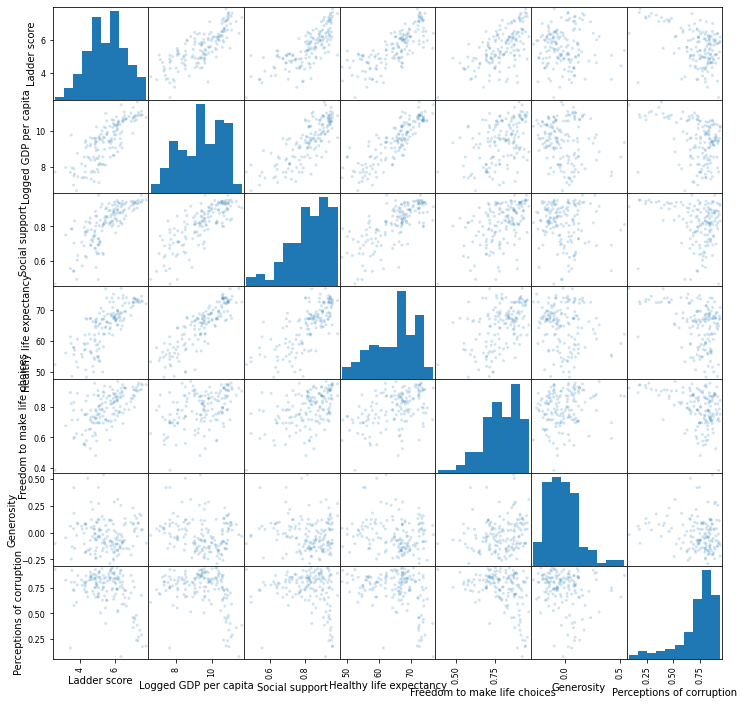

In [7]:
n=pd.plotting.scatter_matrix(hppy2, alpha=0.2, figsize=(12,12))

### Multiple indicators on one plot

Make a scatter plot in which:
- X = Happiness
- Y = Social support score
- Colour = Freedom to make choices
- Size = Life expectancy

In [10]:
scr = hppy2[hppy2.columns[0]] # make a copy of happiness

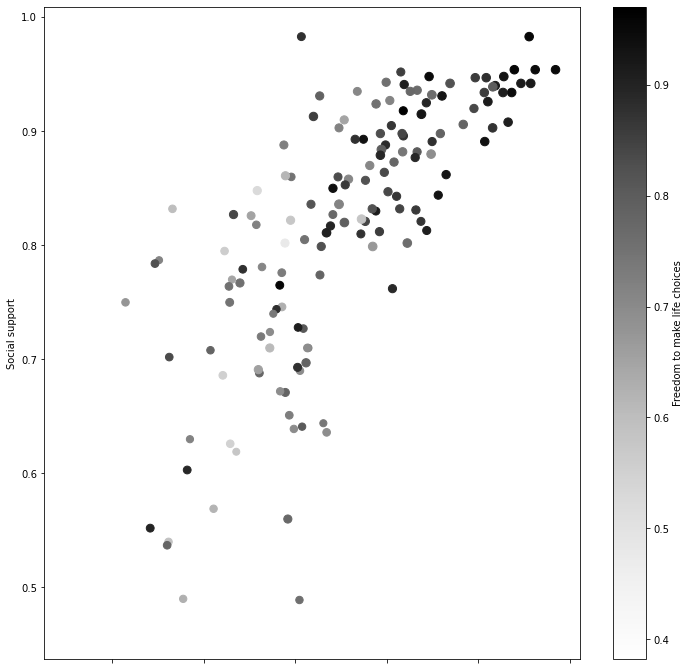

In [11]:


ax = hppy2.plot.scatter(hppy2.columns[0],hppy2.columns[2], hppy2.columns[3], hppy2.columns[4],figsize=(12,12), xlabel = ' Happiness')


